In [ ]:
#github

In [1]:
#importing relevant libraries

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  

from sklearn import tree
from os import system
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset bank-full

bank = pd.read_csv("bank-full.csv")

In [3]:
#Check datatype, shape, statistical summary and null values

print(bank.info())
print()
print(bank.shape)
print()
print(bank.describe())
print()
print(bank.isnull().sum())
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

(45211, 17)

                age        balance           day      duration      campaign  \


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#dropping 'day' column

bank.drop('day', axis=1, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,no


In [5]:
#convert the columns with an 'object' datatype into categorical variables

for feature in bank.columns: # Loop through all columns in the dataframe
    if bank[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank[feature] = pd.Categorical(bank[feature])# Replace strings with an integer
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,may,55,1,-1,0,unknown,no


In [6]:
#checking value count

print(bank.job.value_counts())
print(bank.marital.value_counts())
print(bank.education.value_counts())
print(bank.default.value_counts())
print(bank.housing.value_counts())
print(bank.loan.value_counts())
print(bank.contact.value_counts())
print(bank.month.value_counts())
print(bank.poutcome.value_counts())
print(bank.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [7]:
bank.info() #checking dtype after converting object to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   month      45211 non-null  category
 10  duration   45211 non-null  int64   
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  Target     45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [8]:
replaceStruct = {
                "month":       {"jan":1 , "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12 },
                "default":     {"yes": 1, "no": 0},
                "housing":     {"yes": 1, "no": 0},
                "loan":        {"yes": 1, "no": 0},                                    
                "Target":      {"yes": 1, "no": 0}
                    }
bank2=bank.replace(replaceStruct)
bank2.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,55,1,-1,0,unknown,0


In [9]:
oneHotCols=["job","marital","education","contact","poutcome"]
bank3=pd.get_dummies(bank2, columns=oneHotCols)
bank3.head(10)

,age,default,balance,housing,loan,month,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,1,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
7,42,1,2,1,0,5,380,1,-1,0,...,0,1,0,0,0,1,0,0,0,1
8,58,0,121,1,0,5,50,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
9,43,0,593,1,0,5,55,1,-1,0,...,1,0,0,0,0,1,0,0,0,1


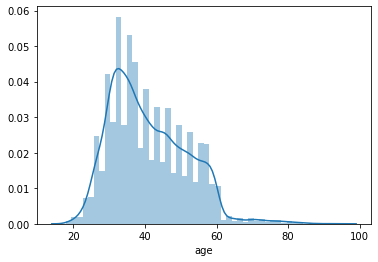

In [10]:
#distplot for age
sns.distplot(bank3['age'])  #age data looks skewed

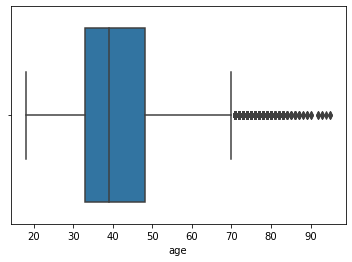

In [11]:
#boxplot age
sns.boxplot(bank3['age']) #looks like we have wiskers, however, to avoid affecting the overall dataset, age outliers shall be kept

In [12]:
print(bank.age.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64


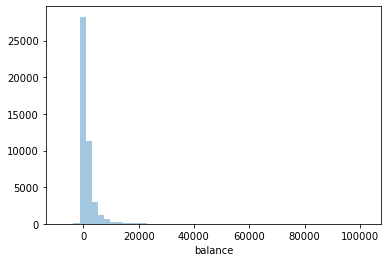

In [13]:
#distplot for balance
sns.distplot(bank3['balance'], kde=False)  #balance data is slightly skewed, but outliers will also be kept to avoid disturbing the overall dataset

In [14]:
print(bank.balance.value_counts())

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64


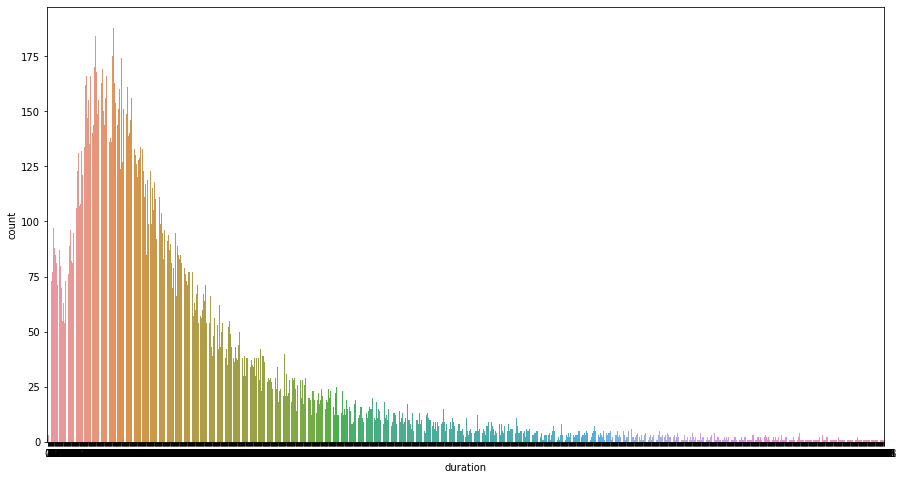

In [15]:
#distplot for duration
plt.figure(figsize=(15,8))
sns.countplot(bank3['duration'])  

In [16]:
#dropping call duration of zero seconds
bank4= bank3[bank3['duration'] > 0]

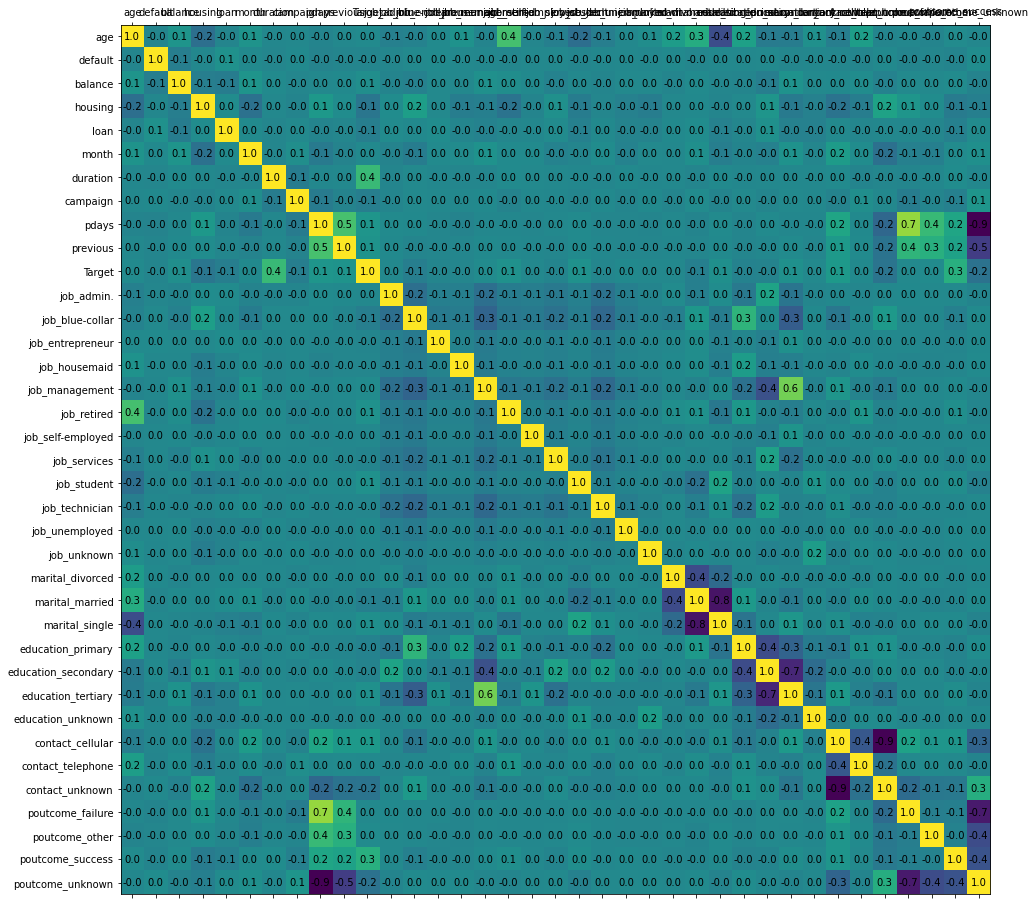

In [17]:
#plot correlation matrix for the whole dataset

def plot_corr(bank4, size=16):
    corr = bank4.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(bank4)

In [18]:
# there is no strong correlation between the independent variables and the dependable (target) variable
#Howevere, there is indication of strong correlation between some of the independent variables
# pdays & previous corr = 0.5
#job_management & education_tertiary corr=0.6
#poutcome_failure & pdays corr=0.7
#marital_single & marital_married corr=0.8
#education_secondary & education_tertiary corr=0.7
#contact_cellular & contact_unknown corr=0.9
#poutcome_failure & poutcome_unknown corr= 0.7
#its decided to drop the following columns (corr>0.5): pday, education_tertiary,marital_single,contact_unknown, poutcome_failure

In [19]:
bank5=bank4.drop(['pdays','marital_single','education_tertiary','contact_unknown','poutcome_failure'], axis=1)

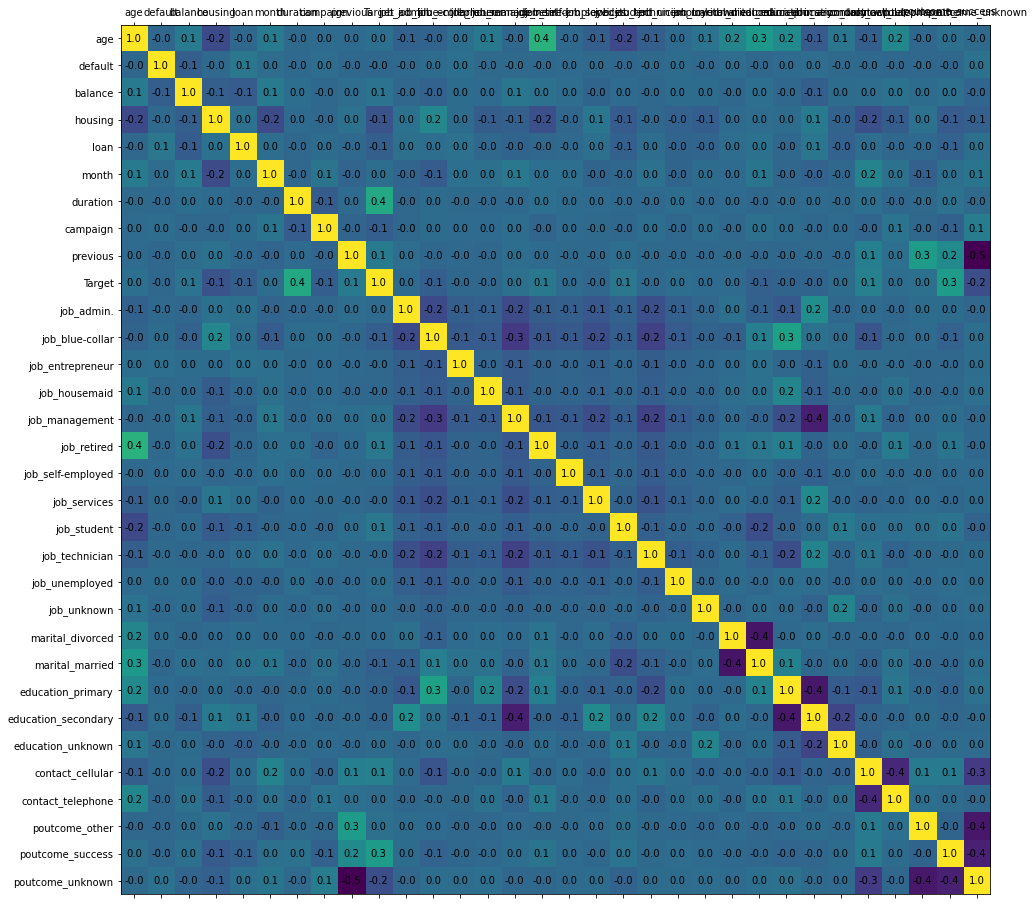

In [20]:
def plot_corr(bank5, size=16):
    corr = bank5.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(bank5)

In [21]:
bank5.info() #bank5 will be used to build the models required

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45208 non-null  int64
 1   default              45208 non-null  int64
 2   balance              45208 non-null  int64
 3   housing              45208 non-null  int64
 4   loan                 45208 non-null  int64
 5   month                45208 non-null  int64
 6   duration             45208 non-null  int64
 7   campaign             45208 non-null  int64
 8   previous             45208 non-null  int64
 9   Target               45208 non-null  int64
 10  job_admin.           45208 non-null  uint8
 11  job_blue-collar      45208 non-null  uint8
 12  job_entrepreneur     45208 non-null  uint8
 13  job_housemaid        45208 non-null  uint8
 14  job_management       45208 non-null  uint8
 15  job_retired          45208 non-null  uint8
 16  job_self-employed    4

In [23]:
#splitting the data
X = bank5.drop("Target" , axis=1)
Y = bank5.pop("Target")

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [25]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.252783
         Iterations 8


In [26]:
#Summary of logistic regression
from scipy import stats
from sklearn import metrics

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31645
Model:                          Logit   Df Residuals:                    31614
Method:                           MLE   Df Model:                           30
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3088
Time:                        22:22:02   Log-Likelihood:                -7999.3
converged:                       True   LL-Null:                       -11573.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.0078        nan        nan        nan         nan         nan
age                     0.0002      0.003      0.089      0.929      -0.005       0.005
default         

In [27]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
Ylr_predict = logreg.predict(X_test)

In [29]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8931268762837731

Testing accuracy 0.8976627589766276

Confusion Matrix


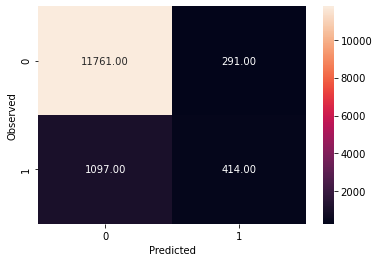

None

Recall: 0.2739907346128392

Precision: 0.5872340425531914

F1 Score: 0.37364620938628157

Roc Auc Score: 0.6249226822748896


In [30]:
print("Trainig accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ylr_predict))
print()
print("Recall:",recall_score(Y_test,Ylr_predict))
print()
print("Precision:",precision_score(Y_test,Ylr_predict))
print()
print("F1 Score:",f1_score(Y_test,Ylr_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ylr_predict))

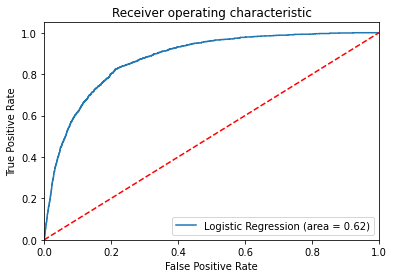

In [31]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.5,solver=i)  # changing values of solver
    model.fit(X_train, Y_train) 
    Ylr_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.899, 0.895, 0.899, 0.881, 0.88]

[0.904, 0.899, 0.904, 0.889, 0.888]


In [33]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.5,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, Y_train) 
    Ylr_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.899, 0.88]

[0.904, 0.888]


In [34]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, Y_train) 
    Ylr_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,Y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, Y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.897, 0.899, 0.899, 0.899, 0.899, 0.899]

[0.902, 0.904, 0.904, 0.904, 0.904, 0.904]


Trainig accuracy 0.8987517775319955

Testing accuracy 0.9040772690407727

Confusion Matrix


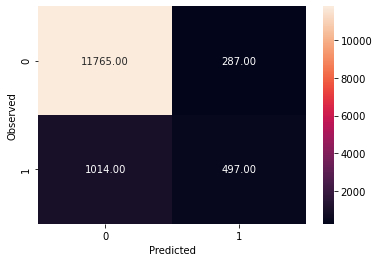

None

Recall: 0.32892124420913305

Precision: 0.6339285714285714

F1 Score: 0.4331154684095861

Roc Auc Score: 0.6525538846336074


In [35]:
#Therefore final model using LR is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.75) 
model.fit(X_train, Y_train)
Ylr_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ylr_predict))
print()
print("Recall:",recall_score(Y_test,Ylr_predict))
print()
print("Precision:",precision_score(Y_test,Ylr_predict))
print()
print("F1 Score:",f1_score(Y_test,Ylr_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ylr_predict))

In [36]:
#Build the Decision Tree model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [37]:
#scoring the Decision Tree
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

1.0
0.8722996387229964


In [38]:
#visualizing the Decision Tree
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [39]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [40]:
#reducing overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, Y_train)
print(dTreeR.score(X_train, Y_train))
print(dTreeR.score(X_test, Y_test))

0.9004582082477485
0.9030450490304505


In [41]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

system command returning error: 1


In [42]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                          Imp
age                  0.000000
default              0.000000
balance              0.000000
housing              0.000000
loan                 0.000000
month                0.000000
duration             0.640837
campaign             0.000000
previous             0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_divorced     0.000000
marital_married      0.000000
education_primary    0.000000
education_secondary  0.000000
education_unknown    0.000000
contact_cellular     0.004923
contact_telephone    0.000000
poutcome_other       0.000000
poutcome_success     0.354240
poutcome_unknown     0.000000


Trainig accuracy 0.9004582082477485

Testing accuracy 0.9030450490304505

Confusion Matrix


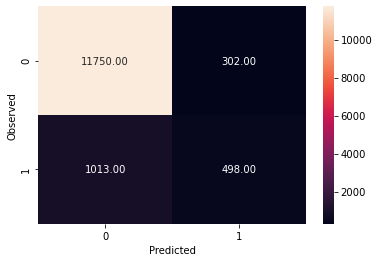

None

Recall: 0.32958305757776307

Precision: 0.6225

F1 Score: 0.4309822587624405

Roc Auc Score: 0.6522624879657816


In [51]:
#confusion matrix for Decision Tree

Ydt_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(Y_test, Ydt_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])


print("Trainig accuracy",dTreeR.score(X_train,Y_train))  
print()
print("Testing accuracy",dTreeR.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ydt_predict))
print()
print("Recall:",recall_score(Y_test,Ydt_predict))
print()
print("Precision:",precision_score(Y_test,Ydt_predict))
print()
print("F1 Score:",f1_score(Y_test,Ydt_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ydt_predict))

In [48]:
#Building Ensemble Model - Bagging

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)


Trainig accuracy 0.9996839943118976

Testing accuracy 0.9010543390105434

Confusion Matrix


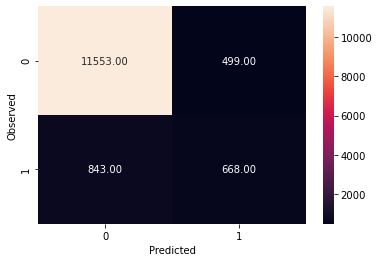

None

Recall: 0.44209133024487096

Precision: 0.572407883461868

F1 Score: 0.4988797610156833

Roc Auc Score: 0.7003437069412208


In [52]:
#confusion matrix for Ensemble Model - Bagging

Ybag_predict = bgcl.predict(X_test)


cm=metrics.confusion_matrix(Y_test, Ybag_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

print("Trainig accuracy",bgcl.score(X_train,Y_train))  
print()
print("Testing accuracy",bgcl.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ybag_predict))
print()
print("Recall:",recall_score(Y_test,Ybag_predict))
print()
print("Precision:",precision_score(Y_test,Ybag_predict))
print()
print("F1 Score:",f1_score(Y_test,Ybag_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ybag_predict))

In [53]:
#Building Ensemble Model - AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, Y_train)

Trainig accuracy 0.8908832358982461

Testing accuracy 0.8963356189633562

Confusion Matrix


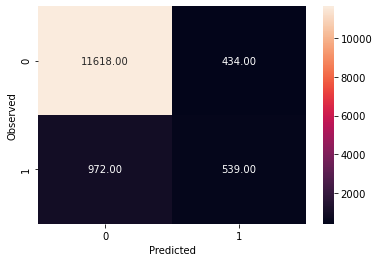

None

Recall: 0.356717405691595

Precision: 0.5539568345323741

F1 Score: 0.4339774557165862

Roc Auc Score: 0.6603533925238592


In [56]:
#confusion matrix for Ensemble Model - AdaBoost

Ybos_predict = abcl.predict(X_test)


cm=metrics.confusion_matrix(Y_test, Ybos_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

print("Trainig accuracy",abcl.score(X_train,Y_train))  
print()
print("Testing accuracy",abcl.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ybos_predict))
print()
print("Recall:",recall_score(Y_test,Ybos_predict))
print()
print("Precision:",precision_score(Y_test,Ybos_predict))
print()
print("F1 Score:",f1_score(Y_test,Ybos_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ybos_predict))

In [57]:
#Building Ensemble Model - GradientBoost

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

Trainig accuracy 0.904376678780218

Testing accuracy 0.9066578190665782

Confusion Matrix


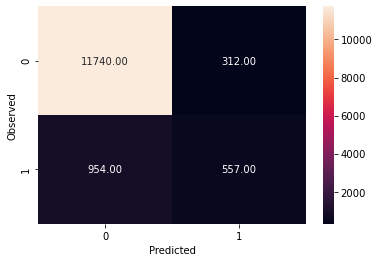

None

Recall: 0.3686300463269358

Precision: 0.6409666283084005

F1 Score: 0.4680672268907563

Roc Auc Score: 0.671371113438941


In [60]:
#confusion matrix for Ensemble Model - GradientBoost

Ygbos_predict = gbcl.predict(X_test)

cm=metrics.confusion_matrix(Y_test, Ygbos_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

print("Trainig accuracy",gbcl.score(X_train,Y_train))  
print()
print("Testing accuracy",gbcl.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Ygbos_predict))
print()
print("Recall:",recall_score(Y_test,Ygbos_predict))
print()
print("Precision:",precision_score(Y_test,Ygbos_predict))
print()
print("F1 Score:",f1_score(Y_test,Ygbos_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Ygbos_predict))

In [61]:
#Building Ensemble Model - Random Forest

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, Y_train)

Trainig accuracy 0.9996839943118976

Testing accuracy 0.9047408390474084

Confusion Matrix


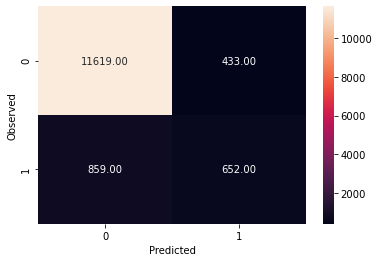

None

Recall: 0.4315023163467902

Precision: 0.6009216589861751

F1 Score: 0.5023112480739599

Roc Auc Score: 0.6977873347415996


In [64]:
#confusion matrix for Ensemble Model - RandomForest

Yrf_predict = rfcl.predict(X_test)

cm=metrics.confusion_matrix(Y_test, Yrf_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

print("Trainig accuracy",rfcl.score(X_train,Y_train))  
print()
print("Testing accuracy",rfcl.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Yrf_predict))
print()
print("Recall:",recall_score(Y_test,Yrf_predict))
print()
print("Precision:",precision_score(Y_test,Yrf_predict))
print()
print("F1 Score:",f1_score(Y_test,Yrf_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Yrf_predict))

In [71]:
#Building df to compare the models metrics

modelscore = {'model':['LogisticRegression', 'DecisionTree', 'Bagging', 'AdaBoosting','GradientBoost','RandomForest'], 
              'Recall':       [0.330, 0.330, 0.442, 0.357, 0.369, 0.432],
              'Precision':    [0.634, 0.623, 0.572, 0.554, 0.641, 0.601],
              'F1 Score':     [0.433, 0.431, 0.499, 0.434, 0.486, 0.502],
              'Roc Auc Score':[0.653, 0.652, 0.700, 0.660, 0.671, 0.698]
              }
modelscore_df = pd.DataFrame(modelscore)

In [72]:
modelscore_df.set_index('model', inplace=True)

In [73]:
modelscore_df

,Recall,Precision,F1 Score,Roc Auc Score
model,,,,
LogisticRegression,0.330,0.634,0.433,0.653
DecisionTree,0.330,0.623,0.431,0.652
Bagging,0.442,0.572,0.499,0.700
AdaBoosting,0.357,0.554,0.434,0.660
GradientBoost,0.369,0.641,0.486,0.671
RandomForest,0.432,0.601,0.502,0.698


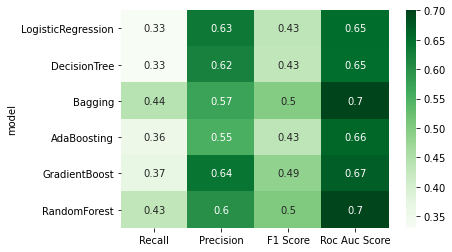

In [75]:
sns.heatmap(modelscore_df, annot=True, cmap='Greens')

In [ ]:
#The focus is to identify potential customers who are more lijely to subscribe to term deposit
#therefore, we focus more on the highest recall and precision (to increase the likelyhood of potential customers)
#hence, RandomForest model serves the purpose
#The removal of some data columns might had an effect on the performance of the model, in addition to some outliers which
#were kept to maintain the dataset, however, the RandomForest model predicts a true 43% subscription rate
#while bagging model predicts a true 44%, however the precisin falls a bit in comparison with the randomforest